In [43]:
import numpy as np
import csv
import math as m
import scipy.constants as sp

debug=0
# constants
k_b=sp.k # boltzman const(k_b) in SI
sig = sp.sigma # stefan boltzmann constant
c=sp.c # speed of light
h=sp.h # Planck's const
pi=np.pi # pi


# emmisivity, refl, trans  csv data transferred into matrix 
e=np.array(list(csv.reader(open("repository/repo/TER_file_cryorun7_emiss.csv","r"),delimiter=','))).astype('float')
d_r=np.array(list(csv.reader(open("repository/repo/TER_file_cryorun7_refl.csv","r"),delimiter=','))).astype('float')
t=np.array(list(csv.reader(open("repository/repo/TER_file_cryorun7_trans.csv","r"),delimiter=','))).astype('float')
s_r=np.array(list(csv.reader(open("repository/repo/spec refl.csv","r"),delimiter=','))).astype('float')

import numpy as np
A=[]
A=np.random.rand(6000,13)
AA= A*(10**-21)

In [44]:
n_e = 13
n_k = 6000
view_factor = 1
step_size = 100
t_0 = 300
t_n = 4.2

value_low = 10.**-4
value_high = 1.-value_low

k = 0
Q_total = 0
Q = []
E = []
k_values = []

for a in range(0, n_k):
    for b in range(0, n_e):
        while (t[a,b] == 0):
            t[a,b]= value_low
        while (d_r[a,b] == 0):
            d_r[a,b]= value_low    

for i in range(0, n_k):
    
    #Do my r_s, r_d, t, e values add up to one (or close to)?
    
    #Resistance
    R_T = 0.
    R_T += d_r[i, 0]/((1-s_r[i, 0])*e[i, 0]) + 1/((1-s_r[i, 0])*(1-s_r[i, 1])*view_factor)
    
    for j in range(1, n_e-1):
        R_T += (1/((2*d_r[i, j]/((1-s_r[i, j])*e[i, j]))) + t[i, j]/(1-t[i, j]))**-1 +\
                1/((1-s_r[i, j])*(1-s_r[i, j+1])*view_factor)
            
    R_T += 1/((1-s_r[i, j])*(1-s_r[i, j+1])*view_factor) +\
            d_r[i, j+1]/(1-s_r[i, j+1])*e[i, j+1]
        
    
    k += 100
    
    #Large value correction
    def volt(k, T):
        import decimal as dc
        index = h*c*k/k_b/T
        if (index) > 10**2.8:
            return (0.)
        elif (index) < 10.**(-4):
            return (2*(k**2)*k_b*T)
        else:
            return (2*h*c*k**3)*(1/((m.e**(h*c*k/k_b/T))-1))

    #Current    
   

    I = (volt(k, t_0) - volt(k, t_n))/R_T
    #Q.append(I)
    #Q_total += I*c*step_size*m.pi
    
    #Emissive powers
    E_elements = []
    voltage = volt(k, t_0)
    E_elements.append(voltage)
    
    #first element
    voltage -= I*(d_r[i,0]/(1-s_r[i,0])/e[i,0] + 1/(1-s_r[i,0])/(1-s_r[i,1])/view_factor)
    voltage -= I*((1-t[i,1])/t[i,1])*(d_r[i,1]/(1-s_r[i,1])/e[i,1])/\
               (2*d_r[i,1]/(1-s_r[i,1])/e[i,1] + (1-t[i,1])/t[i,1])
    E_elements.append(voltage)
    
    if debug:
        k=1.
        T=1000.
        print(c)
        print(h)
        print(k_b)
        print(volt(k,T))
        print(h*c*k/k_b/T)
        print(2*k**2*k_b*T)
        print(2*h*c*k**3/(m.e**(h*c*k/k_b/T)-1)) 
        a = input('Press enter to continue')
    
    #2nd to last-second element
    for l in range(1, n_e-2):
        voltage -= I*((1-t[i,l])/t[i,l])/(2*d_r[i,l]/(1-s_r[i,l])/e[i,l] +
                                          (1-t[i,l])/t[i,l])*(d_r[i,l]/(1-s_r[i,l])/e[i,l])
        voltage -= I*(1/(1-s_r[i,l])/(1-s_r[i,l+1])/view_factor)
        voltage -= I*((1-t[i,l+1])/t[i,l+1])/(2*d_r[i,l+1]/(1-s_r[i,l+1])/e[i,l+1] + 
                                              (1-t[i,l+1])/t[i,l+1])*(d_r[i,l+1]/(1-s_r[i,l+1])/e[i,l+1])
        E_elements.append(voltage)
  
    #last element
    voltage -= I*((1-t[i,l+1])/t[i,l+1])/(2*d_r[i,l+1]/(1-s_r[i,l+1])/e[i,l+1] +
                                          (1-t[i,l+1])/t[i,l+1])*(d_r[i,l+1]/(1-s_r[i,l+1])/e[i,l+1])
    voltage -= I*(1/(1-s_r[i,l+1])/(1-s_r[i,l+2])/view_factor + 
                  d_r[i,l+2]/(1-s_r[i,l+2])/e[i,l+2])
    E_elements.append(voltage)
    
    E.append(E_elements)
    E_elements = []
    A = np.array(E)
    k_values.append(k)

A=A#+AA

/mnt/lovelace/software/anaconda/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:33: RuntimeWarning: divide by zero encountered in double_scalars


In [49]:
from matplotlib import pyplot

def plot(element_number):
    E_graph = []
    for i in range(0, n_k):
        E_graph.append(A[i, element_number])
    
    %matplotlib inline
    pyplot.plot(np.array(k_values), np.array(E_graph))
    pyplot.axis([100,600000, 0., 6.E-12])
    #pyplot.axis([100, 600000, np.amin(E_graph), np.amax(E_graph)])
    #pyplot.xlim(0,600000)
    #pyplot.ylim(0,5*(10^-12))
    pyplot.show()
    
    print ('area= %d' %(np.trapz(E_graph, k_values)*c*step_size*m.pi))

plot no. 0


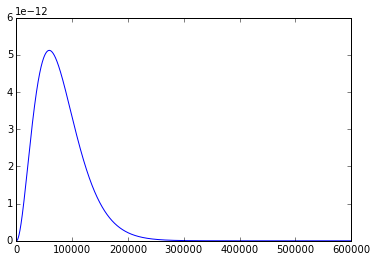

area= 45930
plot no. 1


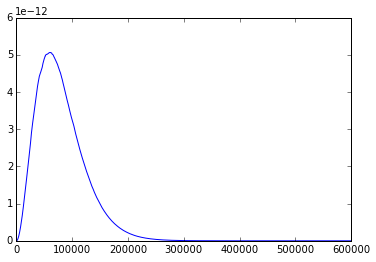

area= 45124
plot no. 2


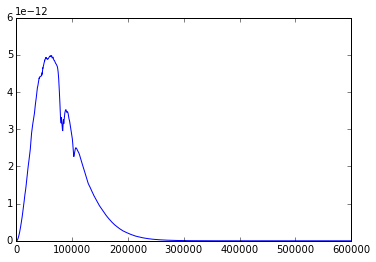

area= 41968
plot no. 3


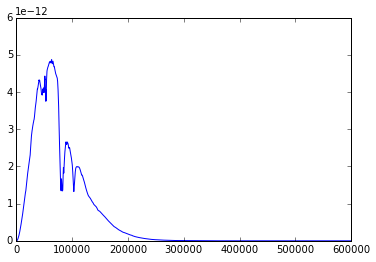

area= 36087
plot no. 4


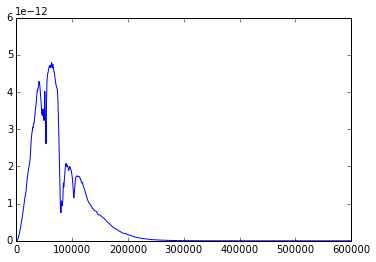

area= 32557
plot no. 5


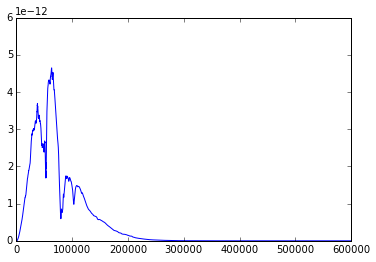

area= 27684
plot no. 6


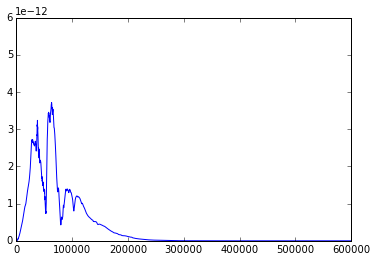

area= 20988
plot no. 7


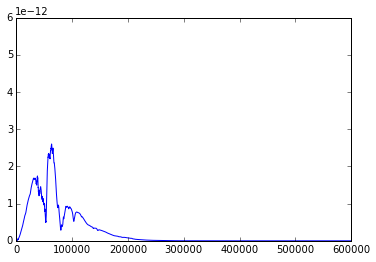

area= 13890
plot no. 8


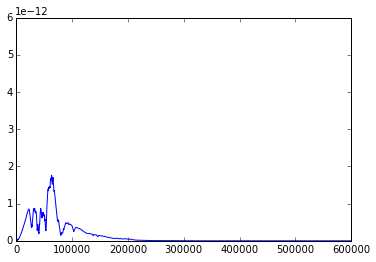

area= 7467
plot no. 9


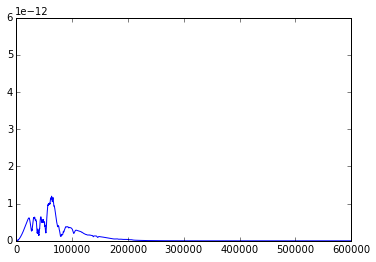

area= 5514
plot no. 10


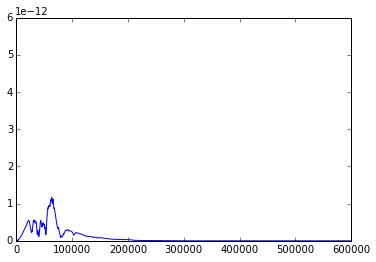

area= 4709
plot no. 11


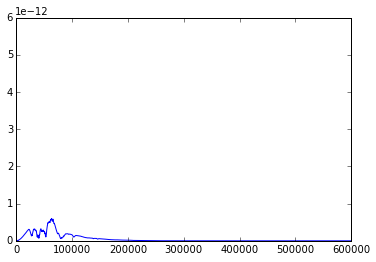

area= 2757
plot no. 12


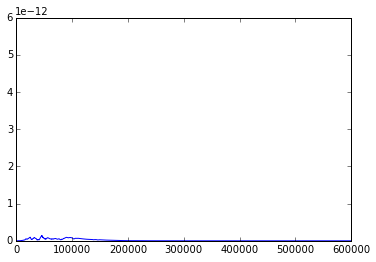

area= 805


In [50]:
for i in range(0, n_e):
    print ("plot no. %d" %i)
    plot(i)


SyntaxError: invalid syntax (<ipython-input-17-e8defa1c77ad>, line 1)

In [4]:
from math import *
from scipy import optimize
import numpy as np
from scipy import *
import scipy.linalg
import scipy.interpolate

def bounded_residuals(z, w, p, model, bounds = -1, weight = -1):
    rednum = 1.e1
    if not ilen(p):
        p = [p]
    if bounds == -1 or not ilen(p) == ilen(bounds):
        bounds = [[0,0] for i in range(len(p))]
    weight = 1. if ilen(weight) == 1 else weight
    if within_bounds(p, bounds):
        return (model(z, p) - w)/weight
    else:
        if not ilen(z):
            return rednum*(model(z,p) - w)/weight
        else:
            return rednum*(model(z,p) - w)/weight

def fitfunc(x, y, func, params, bounds = -1, weights = -1, full_output = False):
    x = array(x)
    y = array(y)
    weights = np.array([1. for i in range(len(x))]) if ilen(weights) == 0 else weights
    errfunc = lambda p, z, w, wght: bounded_residuals(z, w, p, func, bounds = bounds, weight = wght)
    if not full_output:
        p1, success = optimize.leastsq(errfunc, params[:], args=(x,y,weights), full_output=False)
        if not success:
            print ('Fit failed')
            return [0 for i in range(len(params))]
        return p1
    else:
        p1, cov, retval, mesg, info = optimize.leastsq(errfunc, params[:], args=(x,y,weights), full_output=True)
        resvar = np.array(np.array(residuals(x, y, func, p1))/weights)**2
        resvar = (resvar.sum()/(len(resvar) - len(p1)))
        cov = np.matrix(cov)*resvar if not cov == None else None
        return p1, cov

def within_bounds(p, b):
    if not ilen(p):
        p = [p]
        b = [b]
    counter = -1
    value = True
    for pa in p:
        counter += 1
        if max(b[counter]) == min(b[counter]):
            value *= True
        elif pa < max(b[counter]) and pa > min(b[counter]):
            value *= True
        else:
            value *= False
    return value

def ilen(a):
    try:
        n = len(a)
    except:
        n = 0
    return n

#Needed code will look like below

def test(x, a): #Define the function that you want to fit to
    x = np.array(x)
    return a*x**2

x = np.arange(0,10,0.01) #Data independent variable
data = test(x,6.5) + .1*np.random.rand(len(x)) #Data dependent variable (with noise)
fits = fitfunc(x, data, test, [1.]) #Finding the fits for the non-data parameters in test. If test has more than one functional parameter, say coefficients to a polynomial or whatnot, the code will find the fits for all of the parameters
print (fits)

[ 6.50084769]
